# 5.3 Dropout

### 过拟合产生的原因：
- 数据量少
- 神经元多，网络复杂  

### 解决过拟合的方法：
1. 扩充数据集
2. 正则化：  
   - L1 regularization: $cost = (Wx - y)^2 + abs(W)$
   - L2 regularization: $cost = (Wx - y)^2 + W^2$
   - Dropout regularization

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
%matplotlib inline

N_SAMPLES = 20
N_HIDDEN = 300

### 产生数据

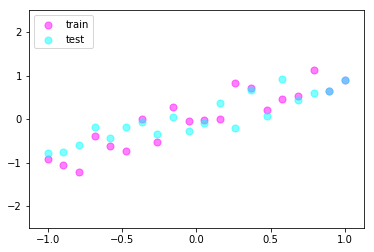

In [2]:
# training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))

# show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

### 定义网络

In [3]:
#过拟合的网络
net_overfitting = nn.Sequential(
    nn.Linear(1,N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN,N_HIDDEN),
    nn.ReLU(),
    nn.Linear(N_HIDDEN,1)
)
#使用dropout的网络
net_dropped = nn.Sequential(
    nn.Linear(1,N_HIDDEN),
    nn.Dropout(0.5), #随机屏蔽50%的连接，不传递信息过来
    nn.ReLU(),
    nn.Linear(N_HIDDEN,N_HIDDEN),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(N_HIDDEN,1)
)
print(net_overfitting)
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [4]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(),lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(),lr=0.01)
loss_func = nn.MSELoss()

### 训练
#### 注：测试阶段不用dropout，因此需要转换成测试模式
- 转换为测试模式，屏蔽dropout：
```python
net.eval()
```
- 转换为训练模式：
```python
net.train()
```

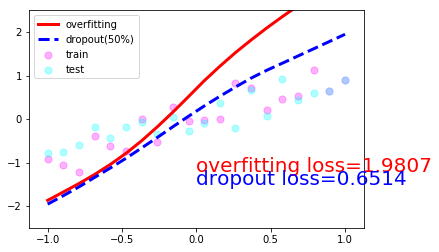

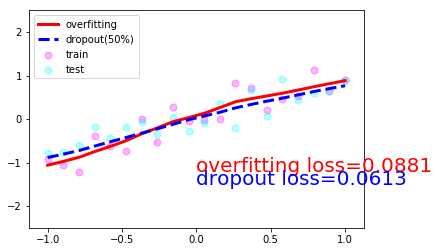

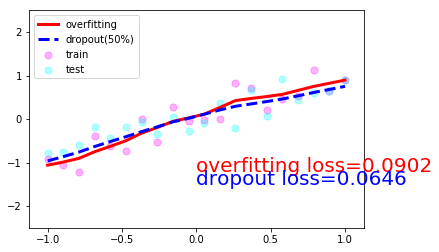

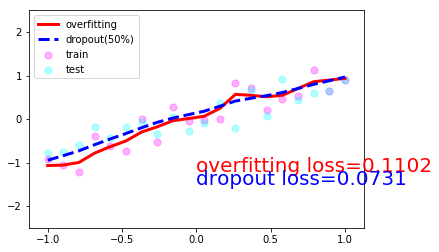

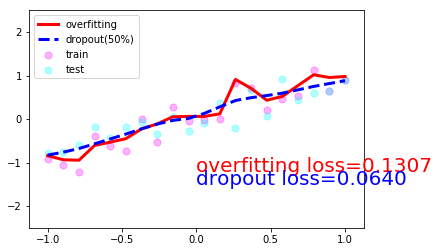

In [5]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit,y)
    loss_drop = loss_func(pred_drop,y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t%100 == 0:
        net_overfitting.eval()
        net_dropped.eval()
        
        #测试
        test_ofit = net_overfitting(test_x)
        test_drop = net_dropped(test_x)
        
        # plotting
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_ofit, test_y).item(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_drop, test_y).item(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5))
        
        net_overfitting.train()
        net_dropped.train()
        plt.show()